In [24]:
import numpy as np
import matplotlib.pyplot as plt


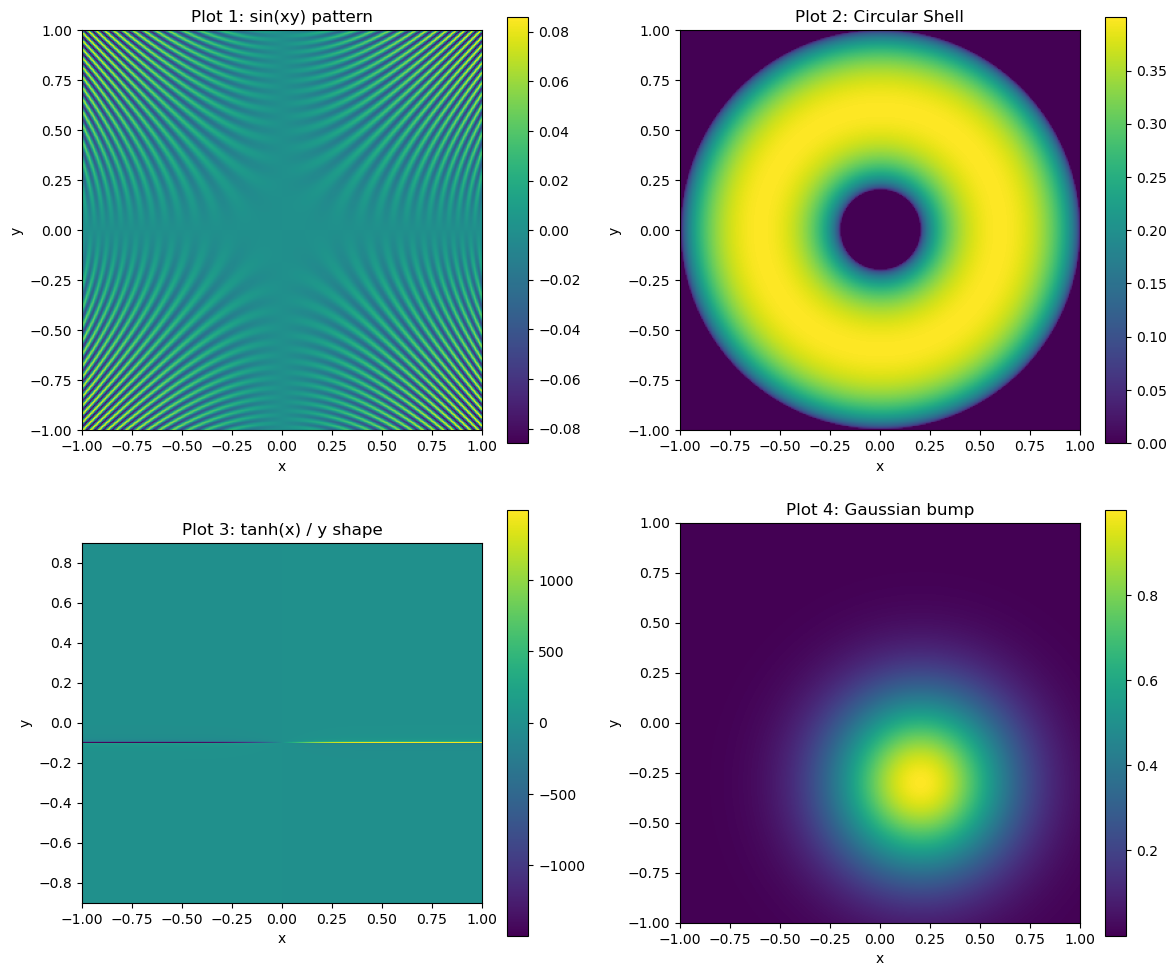

In [26]:
#1

colormap = 'viridis'

x1 = np.linspace(-1, 1, 300)
y1 = np.linspace(-1, 1, 300)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = (np.sin(X1 * Y1) * np.sin(1 - (9 * X1)**2 + (9 * Y1)**2)) / 9

x2 = np.linspace(-1, 1, 300)
y2 = np.linspace(-1, 1, 300)
X2, Y2 = np.meshgrid(x2, y2)
R = np.sqrt(X2**2 + Y2**2)

with np.errstate(invalid='ignore'):
    Z2 = np.sqrt(np.clip(0.4**2 - (0.6 - R)**2, 0, None))

x3 = np.linspace(-1, 1, 300)
y3 = np.linspace(-0.9, 0.9, 300)  # Avoid dividing by 0
X3, Y3 = np.meshgrid(x3, y3)
Z3 = np.tanh(5 * X3) / (Y3 + 0.1)

x4 = np.linspace(-1, 1, 300)
y4 = np.linspace(-1, 1, 300)
X4, Y4 = np.meshgrid(x4, y4)
Z4 = np.exp(-5 * ((X4 - 0.2)**2 + (Y4 + 0.3)**2))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))


# Plot 1 (Top Left)
im1 = axs[0, 0].imshow(Z1, extent=[-1, 1, -1, 1], origin='lower', cmap=colormap)
axs[0, 0].set_title("Plot 1: sin(xy) pattern")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")

# Plot 2 (Top Right)
im2 = axs[0, 1].imshow(Z2, extent=[-1, 1, -1, 1], origin='lower', cmap=colormap)
axs[0, 1].set_title("Plot 2: Circular Shell")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("y")

# Plot 3 (Bottom Left)
im3 = axs[1, 0].imshow(Z3, extent=[-1, 1, -0.9, 0.9], origin='lower', cmap=colormap)
axs[1, 0].set_title("Plot 3: tanh(x) / y shape")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("y")

# Plot 4 (Bottom Right)
im4 = axs[1, 1].imshow(Z4, extent=[-1, 1, -1, 1], origin='lower', cmap=colormap)
axs[1, 1].set_title("Plot 4: Gaussian bump")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("y")

for ax in axs.flat:
    fig.colorbar(ax.images[0], ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()

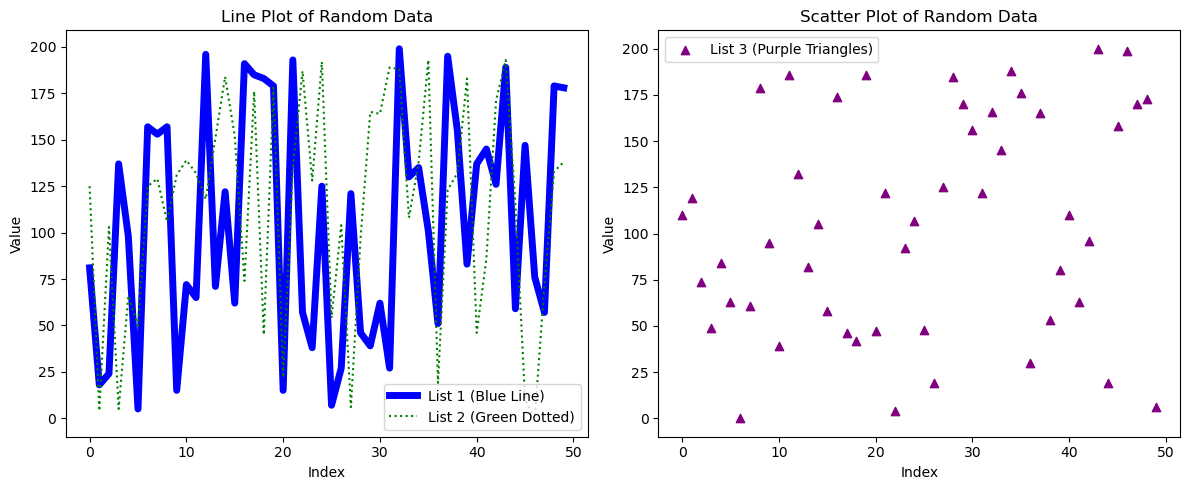

In [18]:
#2

list1 = np.random.randint(0, 201, 50)   
list2 = np.random.randint(0, 201, 50)
list3 = np.random.randint(0, 201, 50)

x_values = list(range(50))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  

ax1.plot(x_values, list1, color='blue', linewidth=5, label='List 1 (Blue Line)')
ax1.plot(x_values, list2, color='green', linestyle=':', label='List 2 (Green Dotted)')
ax1.set_title("Line Plot of Random Data")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")
ax1.legend() 

ax2.scatter(x_values, list3, color='purple', marker='^', label='List 3 (Purple Triangles)')
ax2.set_title("Scatter Plot of Random Data")
ax2.set_xlabel("Index")
ax2.set_ylabel("Value")
ax2.legend()  

plt.tight_layout()
plt.show()


Monte Carlo π Estimates:

N = 10       --> π ≈ 2.800000
N = 1000     --> π ≈ 3.092000
N = 100000   --> π ≈ 3.144680
N = 1000000  --> π ≈ 3.141836


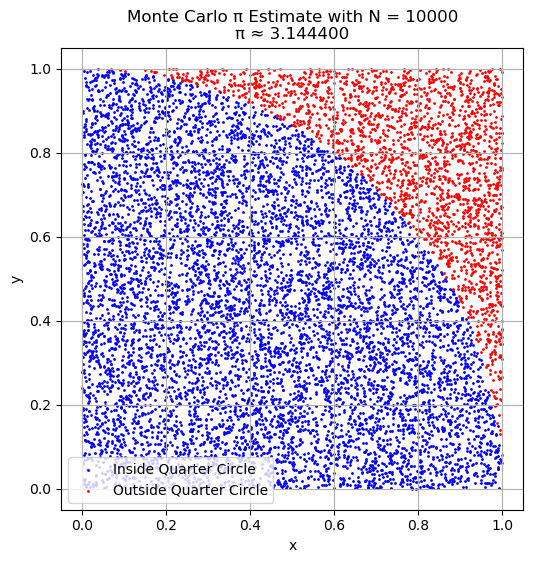

In [20]:
#3

def estimate_pi(N):
    x = np.random.rand(N)
    y = np.random.rand(N)

    inside = x**2 + y**2 <= 1

    num_inside = np.sum(inside)

    pi_estimate = 4 * num_inside / N

    return pi_estimate, x, y, inside

Ns = [10, 1000, 100000, 1000000]
print("Monte Carlo π Estimates:\n")
for N in Ns:
    pi_value, _, _, _ = estimate_pi(N)
    print(f"N = {N:<8} --> π ≈ {pi_value:.6f}")

N_plot = 10000
pi_val, x_plot, y_plot, inside_plot = estimate_pi(N_plot)

x_in = x_plot[inside_plot]
y_in = y_plot[inside_plot]
x_out = x_plot[~inside_plot]
y_out = y_plot[~inside_plot]

plt.figure(figsize=(6, 6))
plt.scatter(x_in, y_in, color='blue', s=1, label='Inside Quarter Circle')
plt.scatter(x_out, y_out, color='red', s=1, label='Outside Quarter Circle')
plt.title(f"Monte Carlo π Estimate with N = {N_plot}\nπ ≈ {pi_val:.6f}")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('square')  
plt.legend()
plt.grid(True)
plt.show()


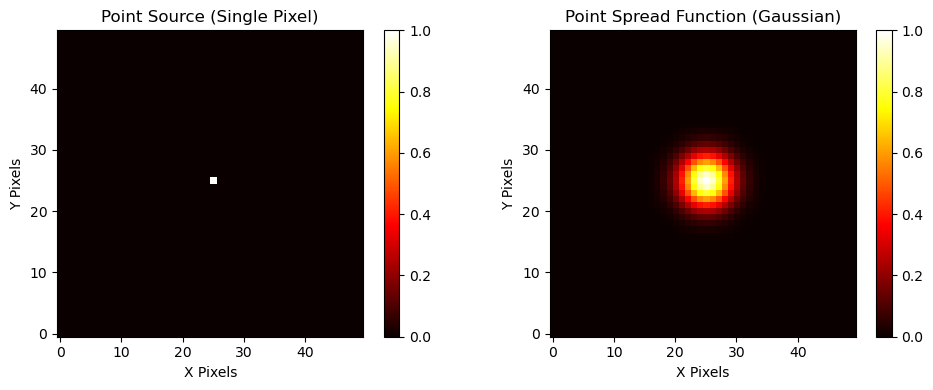

In [28]:
#4

point_source = np.zeros((50, 50))

point_source[25, 25] = 1.0

A = 1.0        
x0, y0 = 25, 25  
sigma = 3      

x = np.arange(0, 50)
y = np.arange(0, 50)
X, Y = np.meshgrid(x, y)

psf = A * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

im1 = ax1.imshow(point_source, cmap='hot', origin='lower')
ax1.set_title("Point Source (Single Pixel)")
ax1.set_xlabel("X Pixels")
ax1.set_ylabel("Y Pixels")
fig.colorbar(im1, ax=ax1, fraction=0.046)

im2 = ax2.imshow(psf, cmap='hot', origin='lower')
ax2.set_title("Point Spread Function (Gaussian)")
ax2.set_xlabel("X Pixels")
ax2.set_ylabel("Y Pixels")
fig.colorbar(im2, ax=ax2, fraction=0.046)

plt.tight_layout()
plt.show()


